In [ ]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab.patches import cv2_imshow
import os
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


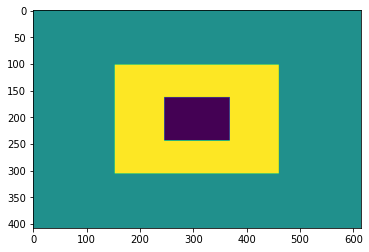

In [ ]:
def init_grabcut_mask(h, w):
    mask = np.ones((h, w), np.uint8) * cv2.GC_PR_BGD
    mask[h//4:3*h//4, w//4:3*w//4] = cv2.GC_PR_FGD
    mask[2*h//5:3*h//5, 2*w//5:3*w//5] = cv2.GC_FGD
    return mask

plt.imshow(init_grabcut_mask(3*136, 3*205))

In [ ]:
def add_contours(image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) != 0:
        cv2.drawContours(image, contours, -1, (255, 0, 0), 3)
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0) ,2)
    


def remove_background(image):
    h, w = image.shape[:2]
    mask = init_grabcut_mask(h, w)
    bgm = np.zeros((1, 65), np.float64)
    fgm = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, None, bgm, fgm, 1, cv2.GC_INIT_WITH_MASK)
    mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = cv2.bitwise_and(image, image, mask = mask_binary)
#add_contours(result, mask_binary) # optional, adds visualizations
    return result



In [ ]:
#%%time  
        
path = "/content/drive/MyDrive/Final_Dataset_Sample/Diseased_and_Non_Diseased_Datasets/Diseased_dataset/Disease"

img_arr_org = []

for files in tqdm(glob.glob(os.path.join(path,"*.JPG"))):
  img = Image.open(files)
  img_arr_org.append(np.asarray(img))


from skimage.io import imsave
  
for i, im in enumerate(img_arr_org):
    #im = cv2.resize(train_images.iloc[i // 2], (3*205, 3*136))
    im = remove_background(im)
    cv2_imshow(im) 
    imsave('/content/drive/MyDrive/Final_Dataset_Sample/Diseased_and_Non_Diseased_Datasets/Diseased_dataset/Segmented/'+str(i+1)+'.JPG',im)   